In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

import statsmodels.api as sm
import tensorflow as tf
import xgboost as xgb
import os
import warnings
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, TimeDistributed, Flatten, Dropout, RepeatVector
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from math import sqrt

%matplotlib inline



ImportError: cannot import name 'Mapping' from 'collections' (c:\Program Files\Python310\lib\collections\__init__.py)

In [2]:
df_energy = pd.read_csv("C:\\Users\\User\\Downloads\\Electricity Demand Forecasting\\demand_Data.csv", parse_dates=True)

In [3]:
df_weather = pd.read_csv("C:\\Users\\User\\Downloads\\Electricity Demand Forecasting\\finWeatherData.csv",parse_dates=True, index_col=0)

In [4]:
df_energy.head()

,Date,Energy Required (MU)
0,02-May-12,255.639
1,03-May-12,258.470
2,04-May-12,261.393
3,05-May-12,252.866
4,06-May-12,250.566


In [5]:
df_weather.head()

,Date,Tmax,Tmin,Rain
0,2019-01-01,28.696802,14.070121,0.0
1,2019-01-02,29.149151,14.778795,0.0
2,2019-01-03,29.741541,15.863366,0.0
3,2019-01-04,29.451434,16.492335,0.0
4,2019-01-05,28.863384,16.951641,0.0


In [6]:

# Convert the date column to datetime format
df_energy['Date'] = pd.to_datetime(df_energy['Date'], format="%d-%b-%y")

# Convert the date column to the desired format
df_energy['Date'] = df_energy['Date'].dt.strftime("%d/%m/%Y")

In [7]:
df_energy.head()

,Date,Energy Required (MU)
0,02/05/2012,255.639
1,03/05/2012,258.470
2,04/05/2012,261.393
3,05/05/2012,252.866
4,06/05/2012,250.566


In [8]:



# Convert the date column to datetime format
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

# Convert the date column to the desired format
df_weather['Date'] = df_weather['Date'].dt.strftime("%d/%m/%Y")




In [9]:
df_weather.head()

,Date,Tmax,Tmin,Rain
0,01/01/2019,28.696802,14.070121,0.0
1,02/01/2019,29.149151,14.778795,0.0
2,03/01/2019,29.741541,15.863366,0.0
3,04/01/2019,29.451434,16.492335,0.0
4,05/01/2019,28.863384,16.951641,0.0


In [10]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1603 entries, 0 to 1602
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1603 non-null   object 
 1   Tmax    1603 non-null   float64
 2   Tmin    1603 non-null   float64
 3   Rain    1603 non-null   float64
dtypes: float64(3), object(1)
memory usage: 62.6+ KB


In [11]:
import pandas as pd

# Convert the "Date" column in df_energy to datetime format
df_energy['Date'] = pd.to_datetime(df_energy['Date'])

# Filter df_energy to include dates starting from 01/01/2019
df_energy = df_energy[df_energy['Date'] >= '2019-01-01']

# Convert the "Date" column in df_weather to datetime format
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

# Filter df_weather to include dates starting from 01/01/2019
df_weather = df_weather[df_weather['Date'] >= '2019-01-01']

# Merge the two DataFrames based on the "Date" column
merged_df = pd.merge(df_energy, df_weather, on='Date', how='inner')


C:\Users\User\AppData\Local\Temp\ipykernel_6872\1104475789.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_energy['Date'] = pd.to_datetime(df_energy['Date'])
C:\Users\User\AppData\Local\Temp\ipykernel_6872\1104475789.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_weather['Date'] = pd.to_datetime(df_weather['Date'])


In [12]:
merged_df.head()

,Date,Energy Required (MU),Tmax,Tmin,Rain
0,2019-01-01,152.233,28.696802,14.070121,0.0
1,2019-02-01,155.343,29.149151,14.778795,0.0
2,2019-03-01,157.659,29.741541,15.863366,0.0
3,2019-04-01,159.317,29.451434,16.492335,0.0
4,2019-05-01,159.691,28.863384,16.951641,0.0


In [13]:
df_weather.shape

(1603, 4)

In [14]:
merged_df.shape

(1593, 5)

In [15]:
merged_df.tail(5)

,Date,Energy Required (MU),Tmax,Tmin,Rain
1588,2023-10-05,218.349,37.245505,26.819468,0.293171
1589,2023-11-05,219.604,37.272888,27.273576,0.000000
1590,2023-12-05,224.523,38.218507,26.842811,0.814892
1591,2023-05-13,224.030,38.145824,27.398606,0.000000
1592,2023-05-14,226.349,39.622750,27.568079,0.000000


In [16]:
merged_df_new=merged_df

In [17]:
merged_df = merged_df.set_index("Date")

In [18]:
merged_df.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01',
               ...
               '2023-05-05', '2023-06-05', '2023-07-05', '2023-08-05',
               '2023-09-05', '2023-10-05', '2023-11-05', '2023-12-05',
               '2023-05-13', '2023-05-14'],
              dtype='datetime64[ns]', name='Date', length=1593, freq=None)

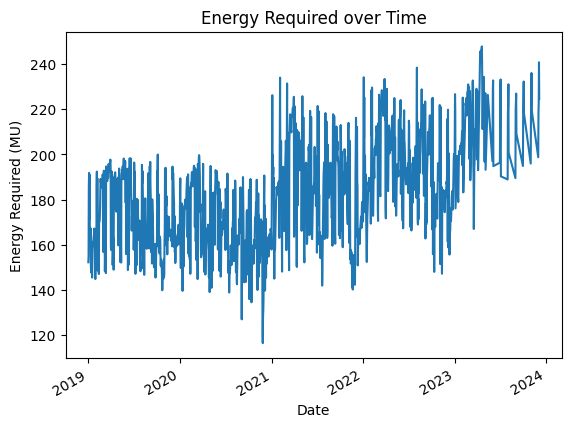

In [24]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'merged_df_new' with a "Energy Required (MU)" column

merged_df["Energy Required (MU)"].plot()

plt.xlabel("Date")
plt.ylabel("Energy Required (MU)")
plt.title("Energy Required over Time")

plt.show()



In [25]:
merged_df.columns

Index(['Energy Required (MU)', 'Tmax', 'Tmin', 'Rain'], dtype='object')

In [26]:
merged_df.isna().sum()

Energy Required (MU)    0
Tmax                    0
Tmin                    0
Rain                    0
dtype: int64

In [27]:
train_end_idx = 1200
cv_end_idx = 1500
test_end_idx = 1560

In [28]:
X = merged_df.values
X

array([[152.233     ,  28.69680159,  14.07012138,   0.        ],
       [155.343     ,  29.14915142,  14.7787947 ,   0.        ],
       [157.659     ,  29.7415409 ,  15.86336569,   0.        ],
       ...,
       [224.523     ,  38.21850707,  26.84281112,   0.81489177],
       [224.03      ,  38.14582355,  27.39860641,   0.        ],
       [226.349     ,  39.62275041,  27.56807882,   0.        ]])

In [29]:
X = merged_df.values
y = merged_df['Energy Required (MU)'].values


In [30]:

y = y.reshape(-1, 1)
y

array([[152.233],
       [155.343],
       [157.659],
       ...,
       [224.523],
       [224.03 ],
       [226.349]])

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [51]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

In [52]:
scaler_X.fit(X[:train_end_idx])
scaler_y.fit(y[:train_end_idx])

MinMaxScaler()

In [53]:
X_norm = scaler_X.transform(X)
y_norm = scaler_y.transform(y)

In [54]:
X_norm

array([[0.29348895, 0.28764007, 0.        , 0.        ],
       [0.31897908, 0.31291132, 0.04684994, 0.        ],
       [0.33796145, 0.34600612, 0.11855023, 0.        ],
       ...,
       [0.88599108, 0.81958557, 0.84439428, 0.01196149],
       [0.88195036, 0.81552499, 0.88113755, 0.        ],
       [0.90095731, 0.8980359 , 0.89234126, 0.        ]])

In [55]:
merged_df.shape[0]

1593

In [69]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size
        
    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])
        
        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i : i + target_size])

    return np.array(data), np.array(labels)

In [70]:
dataset_norm = np.concatenate((X_norm, y_norm), axis=1)

past_history = 15
future_target = 1

In [77]:
dataset_norm[1,0:]

array([0.31897908, 0.31291132, 0.04684994, 0.        , 0.31897908])

In [78]:
X_train, y_train = multivariate_data(dataset_norm[:,0:-1], dataset_norm[:, -1],
                                     0, train_end_idx, past_history, 
                                     future_target, step=1, single_step=True)

In [79]:
X_val, y_val = multivariate_data(dataset_norm[:,0:-1], dataset_norm[:, 0],
                                 train_end_idx, cv_end_idx, past_history, 
                                 future_target, step=1, single_step=True)

In [80]:
X_test, y_test = multivariate_data(dataset_norm[:,0:-1], dataset_norm[:, 0],
                                   cv_end_idx, test_end_idx, past_history, 
                                   future_target, step=1, single_step=True)

In [81]:
batch_size = 32
buffer_size = 1000

In [85]:
X_train.shape

(1185, 15, 4)

In [52]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/62.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/62.6 kB ? eta -:--:--
     ------------ ------------------------- 20.5/62.6 kB 217.9 kB/s eta 0:00:01
     ------------------ ------------------- 30.7/62.6 kB 187.9 kB/s eta 0:00:01
     ------------------ ------------------- 30.7/62.6 kB 187.9 kB/s eta 0:00:01
     ------------------------ ------------- 41.0/62.6 kB 164.3 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/62.6 kB 175.0 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/62.6 kB 175.0 kB/s eta 0:00:01
     -------------------------------------  61.4/62.6 kB 172.4 kB/s eta 0:00:01
     -------------------------------------  61.4/62.6 kB 172.4 kB/s eta 0:00:01
     -------------------------------------  61.4/62.6 kB 172.4 kB/s eta 0:00:01
     -------------------------------------  61.4/62.6 kB 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.14.1 requires torch==1.13.1, but you have torch 2.0.1 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import tensorflow as tf

ImportError: cannot import name 'Mapping' from 'collections' (c:\Program Files\Python310\lib\collections\__init__.py)

In [53]:
from collections.abc import Mapping
from typing import Mapping


In [86]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)
X_val_tensor = torch.tensor(X_val)
y_val_tensor = torch.tensor(y_val)

# Create training dataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Create validation dataset
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)


In [87]:
import torch
import torch.nn as nn

# Define the stacked LSTM model
class StackedLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(StackedLSTM, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        
        # Define the LSTM layers
        self.lstm_layers = nn.ModuleList()
        for i in range(num_layers):
            if i == 0:
                self.lstm_layers.append(nn.LSTM(input_size, hidden_size, batch_first=True))
            else:
                self.lstm_layers.append(nn.LSTM(hidden_size, hidden_size, batch_first=True))
        
        # Define the output layer
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        h_n, c_n = [], []
        
        # Initialize hidden states and cell states for each layer
        for i in range(self.num_layers):
            h_n.append(torch.zeros(1, batch_size, self.hidden_size).to(x.device))
            c_n.append(torch.zeros(1, batch_size, self.hidden_size).to(x.device))
        
        # Pass the input through each LSTM layer
        for i in range(self.num_layers):
            out, (h_n[i], c_n[i]) = self.lstm_layers[i](x, (h_n[i], c_n[i]))
            x = out
        
        # Use the output of the last LSTM layer as input to the fully connected layer
        out = self.fc(x[:, -1, :])
        
        return out

# Define the parameters for the LSTM model
input_size = X_train_tensor.shape[-1]
hidden_size = 64
num_layers = 5
output_size = 1

# Create an instance of the StackedLSTM model
model = StackedLSTM(input_size, hidden_size, num_layers, output_size)

# Print the model architecture
print(model)


StackedLSTM(
  (lstm_layers): ModuleList(
    (0): LSTM(4, 64, batch_first=True)
    (1-4): 4 x LSTM(64, 64, batch_first=True)
  )
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


4

In [99]:
n_features = 4
trainX = X_train_tensor.reshape((X_train_tensor.shape[0],X_train_tensor.shape[1],n_features))
trainX.shape[0]

1185

In [104]:
trainY= y_train_tensor.reshape(-1,1)

In [105]:
valX = X_val_tensor.reshape((X_val_tensor.shape[0],X_val_tensor.shape[1],n_features))
valY = y_val_tensor.reshape(-1,1)

In [108]:
trainX

tensor([[[0.2935, 0.2876, 0.0000, 0.0000],
         [0.3190, 0.3129, 0.0468, 0.0000],
         [0.3380, 0.3460, 0.1186, 0.0000],
         ...,
         [0.3538, 0.3296, 0.2552, 0.0000],
         [0.3228, 0.3452, 0.2299, 0.0000],
         [0.2660, 0.3506, 0.1861, 0.0000]],

        [[0.3190, 0.3129, 0.0468, 0.0000],
         [0.3380, 0.3460, 0.1186, 0.0000],
         [0.3516, 0.3298, 0.1601, 0.0000],
         ...,
         [0.3228, 0.3452, 0.2299, 0.0000],
         [0.2660, 0.3506, 0.1861, 0.0000],
         [0.2379, 0.3319, 0.2445, 0.0000]],

        [[0.3380, 0.3460, 0.1186, 0.0000],
         [0.3516, 0.3298, 0.1601, 0.0000],
         [0.3546, 0.2969, 0.1905, 0.0000],
         ...,
         [0.2660, 0.3506, 0.1861, 0.0000],
         [0.2379, 0.3319, 0.2445, 0.0000],
         [0.3104, 0.3375, 0.2615, 0.0000]],

        ...,

        [[0.9588, 0.6967, 0.7202, 0.0000],
         [0.8577, 0.7128, 0.7448, 0.0000],
         [0.8097, 0.7265, 0.7813, 0.0000],
         ...,
         [0.7774, 0.6

In [107]:

history = model.fit(trainX,trainY,epochs=50,validation_data=(valX,valY))

AttributeError: 'StackedLSTM' object has no attribute 'fit'

In [47]:
# Define a function to plot different types of time-series

def plot_series(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):
    """
    Plots a certain time-series which has either been loaded in a dataframe
    and which constitutes one of its columns or it a custom pandas series 
    created by the user. The user can define either the 'df' and the 'column' 
    or the 'series' and additionally, can also define the 'label', the 
    'ylabel', the 'title', the 'start' and the 'end' of the plot.
    """
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

C:\Users\User\AppData\Local\Temp\ipykernel_7172\1224047559.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plot_series(df=None, column=None, series=pd.Series([]),


In [48]:
merged_df.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01',
               ...
               '2023-05-05', '2023-06-05', '2023-07-05', '2023-08-05',
               '2023-09-05', '2023-10-05', '2023-11-05', '2023-12-05',
               '2023-05-13', '2023-05-14'],
              dtype='datetime64[ns]', name='Date', length=1593, freq=None)

<Axes: xlabel='Date', ylabel='Energy Required (MU)'>

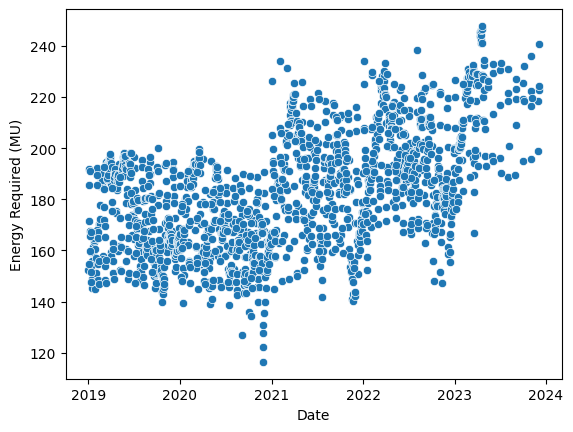

In [49]:
sns.scatterplot(x=merged_df.index,y=merged_df["Energy Required (MU)"])

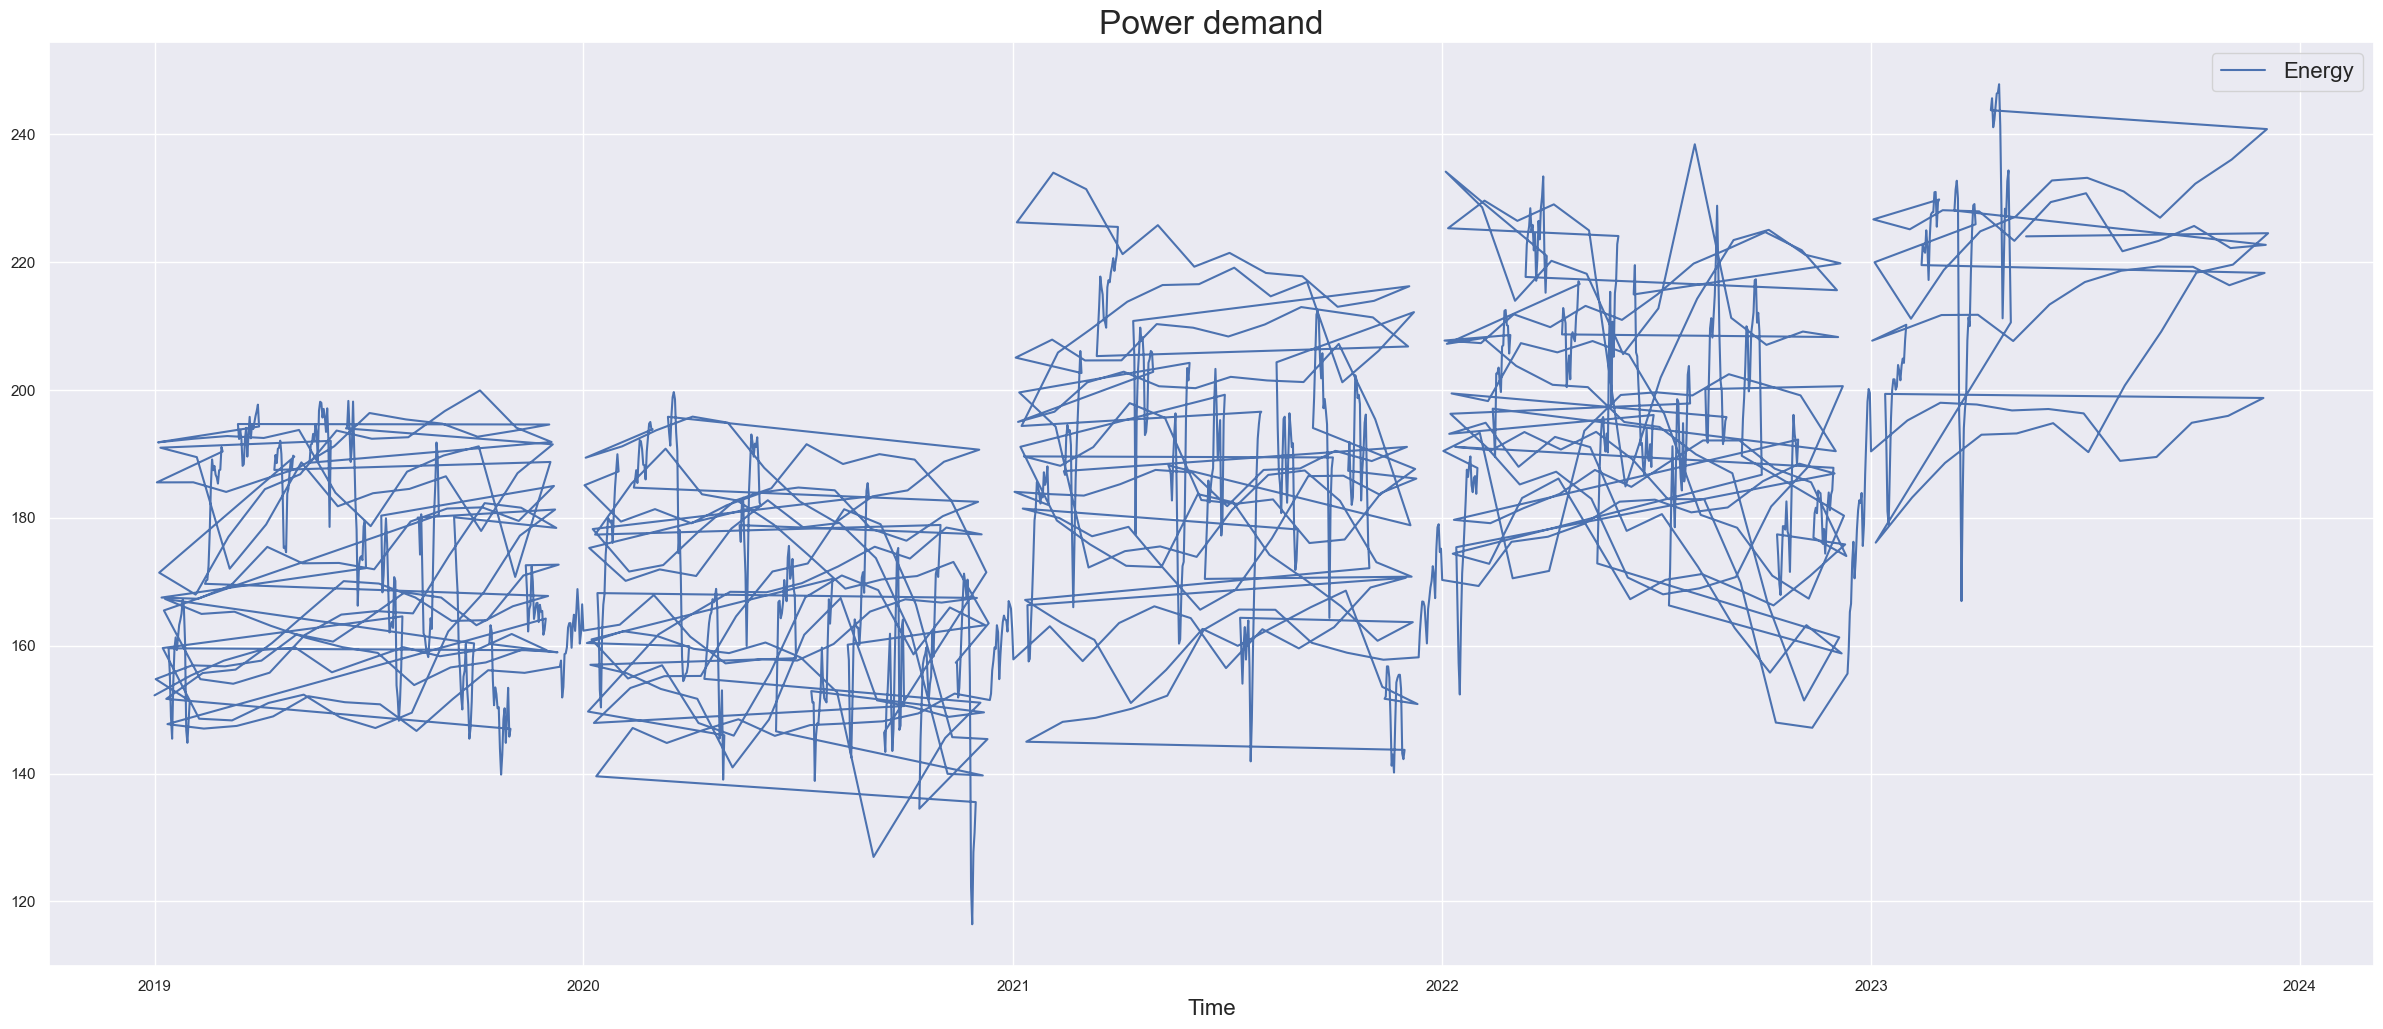

In [50]:
ax= plot_series(merged_df,column='Energy Required (MU)',label='Energy',title ="Power demand",start=0,end=1592)

plt.show()

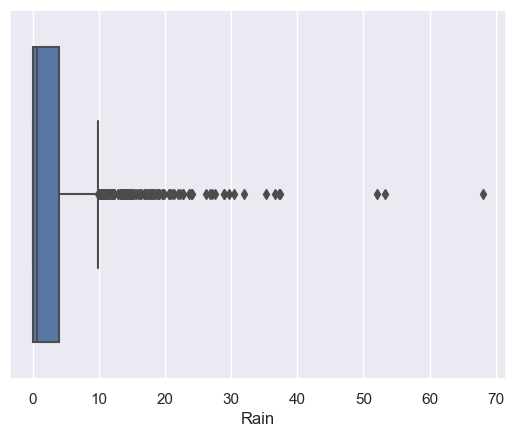

In [51]:
sns.boxplot(x=merged_df['Rain'])
plt.show()

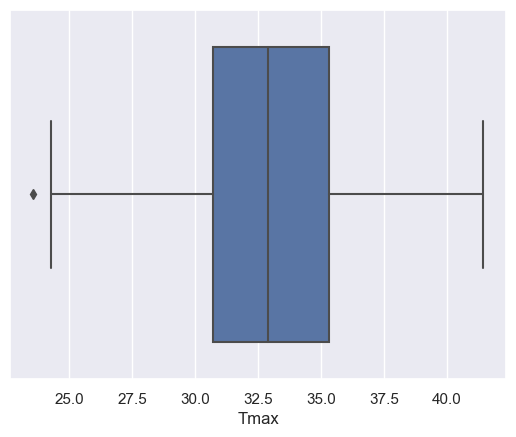

In [52]:
sns.boxplot(x=merged_df['Tmax'])
plt.show()

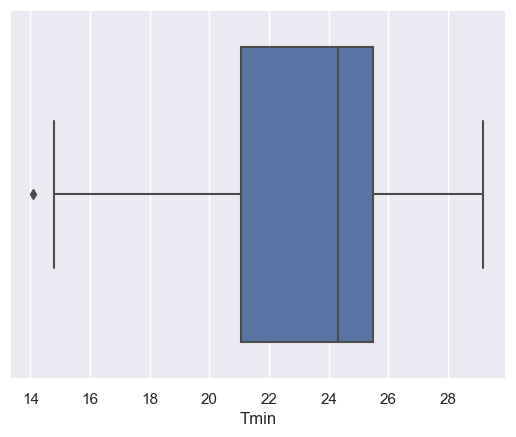

In [53]:
sns.boxplot(x=merged_df['Tmin'])
plt.show()

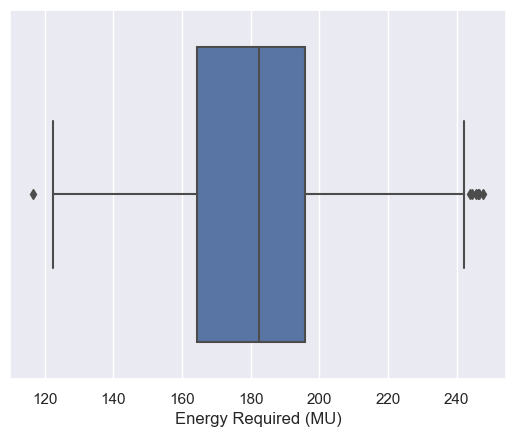

In [54]:
sns.boxplot(x=merged_df['Energy Required (MU)'])
plt.show()

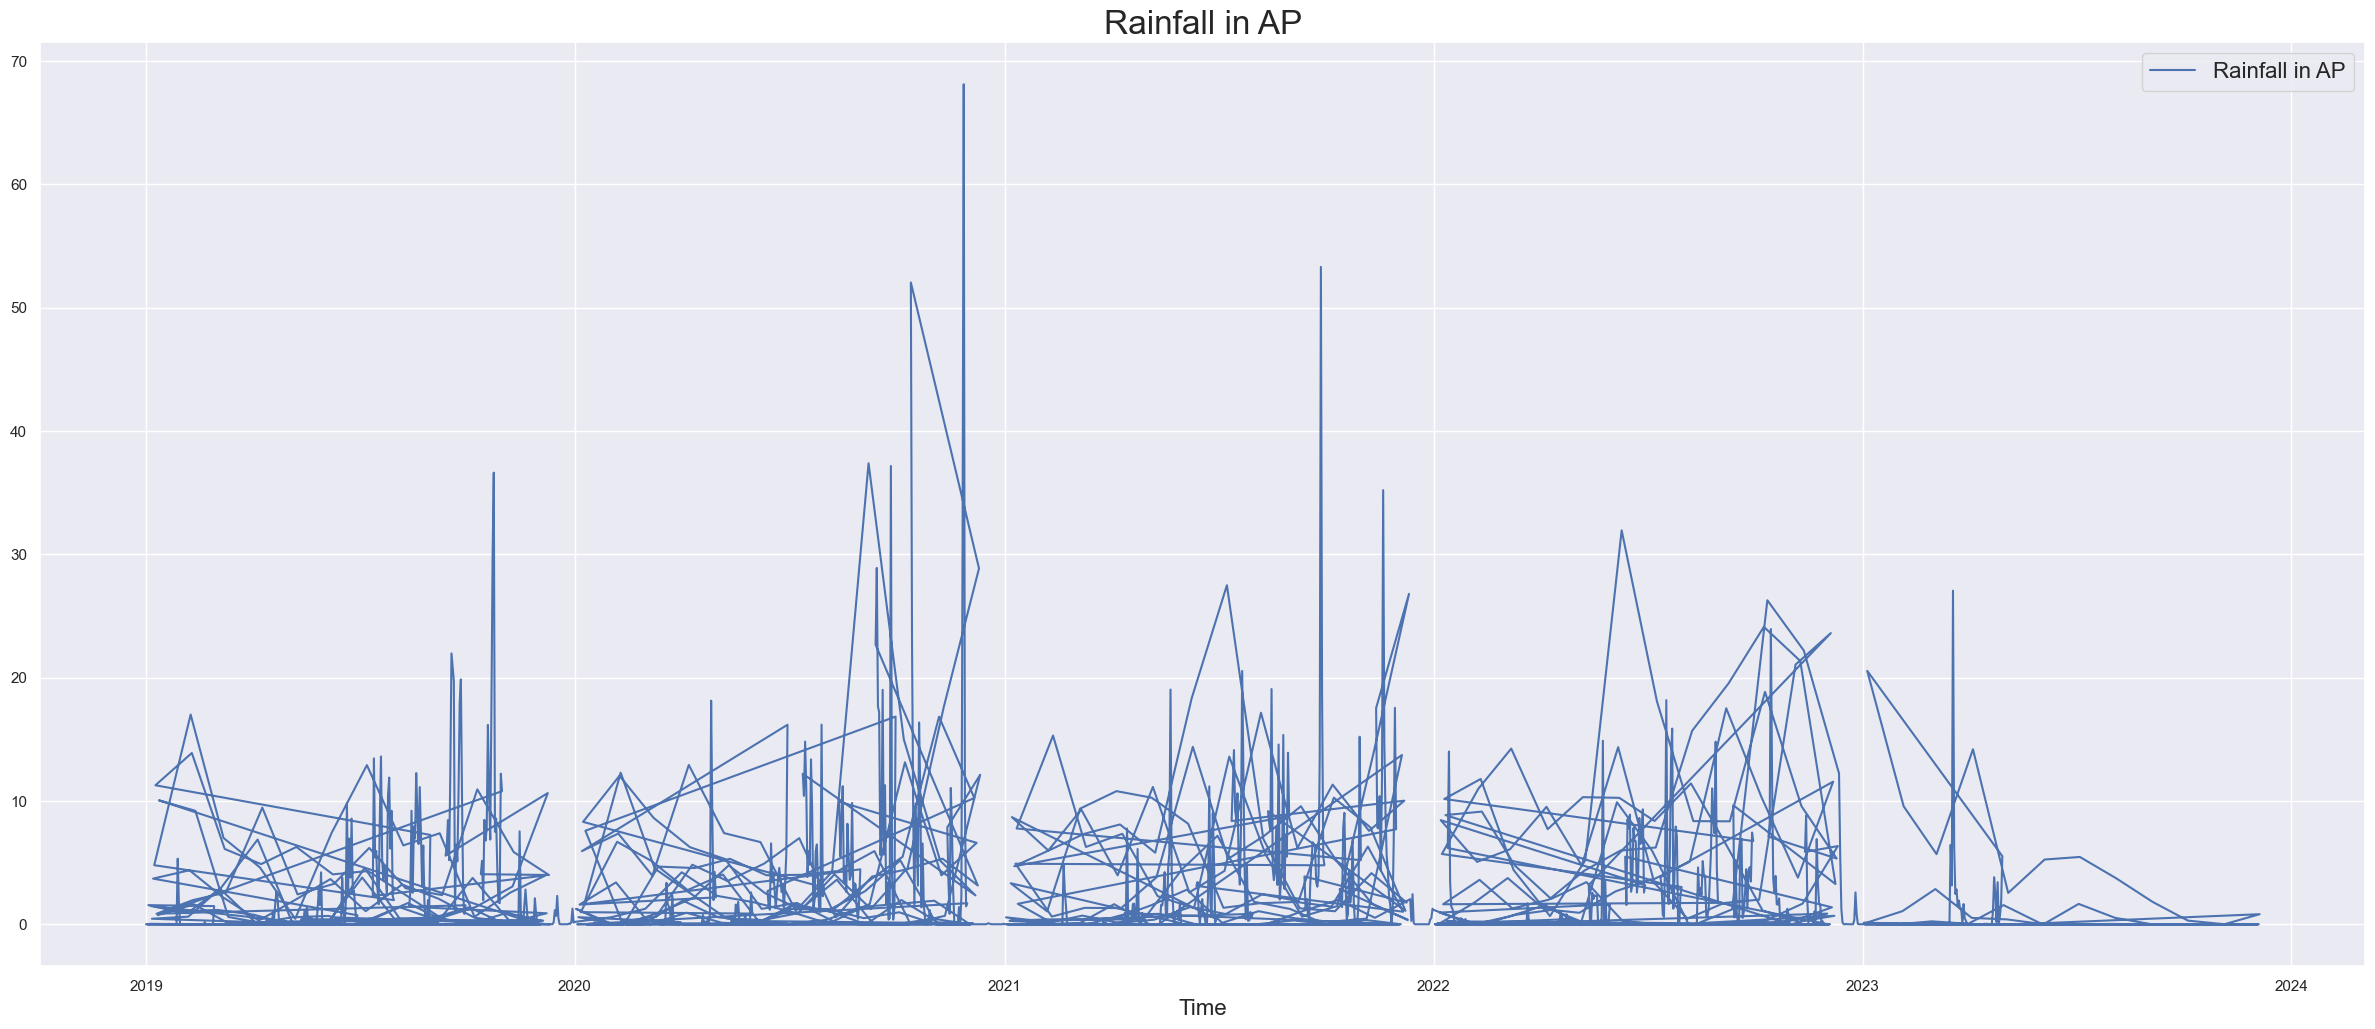

In [55]:
ax= plot_series(merged_df,column='Rain',label='Rainfall in AP',title ="Rainfall in AP",start=0,end=1592)
# Zoom into the plot of the hourly (actual) total load


plt.show()

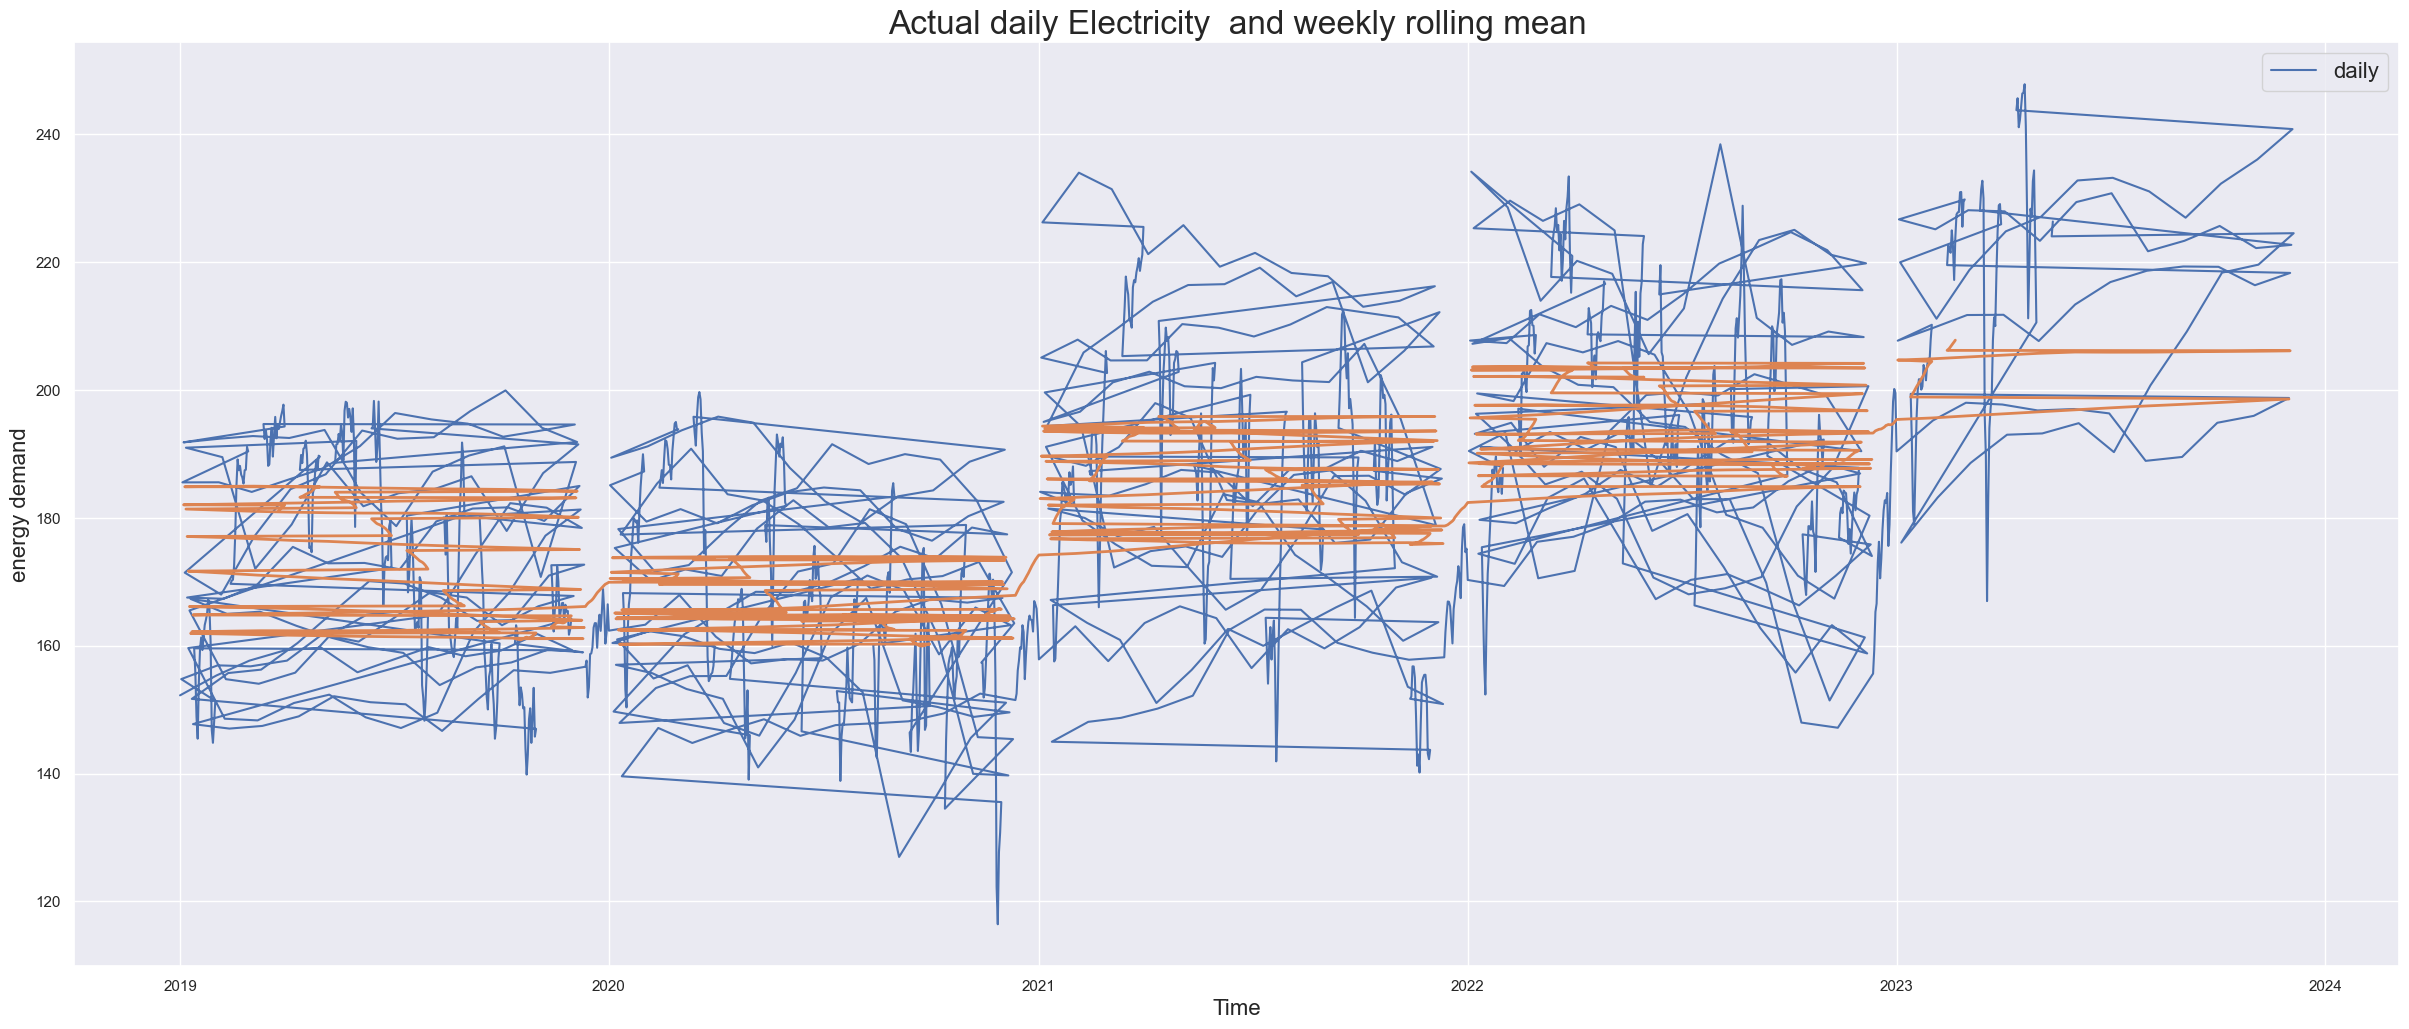

In [56]:
# Plot the hourly actual electricity price, along with the weekly rolling mean

rolling = merged_df['Energy Required (MU)'].rolling(24*7, center=True).mean()
ax = plot_series(merged_df, 'Energy Required (MU)', label='daily', ylabel='energy demand',
                 title='Actual daily Electricity  and weekly rolling mean')
ax.plot(rolling, linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.show()

In [57]:

past 14 rows or records
4 features 
future predictions -
Next Day,next week, next month
ACF
Current target is implementing GluonTS , LSTM, Autoregression models for multivariate time series
and drawaing effective plot_series showing the forecasting results

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2634279668.py, line 1)

GluonTS

In [54]:
from gluonts.mx import DeepAREstimator

ModuleNotFoundError: No module named 'mxnet'

In [ ]:
!pip install mxnet

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

ImportError: cannot import name 'Mapping' from 'collections' (c:\Program Files\Python310\lib\collections\__init__.py)

In [51]:
dataset = PandasDataset(merged_df, target=merged_df["Energy Required (MU)"])

TypeError: object of type 'NoneType' has no len()

In [50]:
# https://ts.gluon.ai/stable/api/gluonts/gluonts.dataset.field_names.html

import pandas as pd
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName

def df2Gdf(df):
    
    df.rename(columns={
        'Date': FieldName.START,
        'Energy Required (MU)': FieldName.TARGET,
        'Tmax': FieldName.FEAT_DYNAMIC_REAL,
        'Tmin': FieldName.FEAT_DYNAMIC_REAL,
        'Rain': FieldName.FEAT_DYNAMIC_REAL
    }, inplace=True)  # Rename the columns for consistency with GluonTS field names

    data = []
    for _, row in df.iterrows():
        data.append(
            {
                FieldName.START: row[FieldName.START],
                FieldName.TARGET: [row[FieldName.TARGET]],
                FieldName.FEAT_DYNAMIC_REAL: [
                    row[FieldName.FEAT_DYNAMIC_REAL],
                ]
            }
        )

    dataset = ListDataset(data, freq="D")
    return dataset

In [41]:
!pip install mxnet
!pip install gluonts

Defaulting to user installation because normal site-packages is not writeable
  Using cached mxnet-1.7.0.post2-py2.py3-none-win_amd64.whl (33.1 MB)
  Using cached requests-2.18.4-py2.py3-none-any.whl (88 kB)
  Using cached numpy-1.16.6.zip (5.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Running setup.py clean for numpy
Failed to build numpy
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Running setup.py install for numpy: started
  Running setup.py install for numpy: finished with status 'error'
  Rolling back uninstall of numpy
  Moving to c:\users\user\appdata\roaming\python\python310\scripts\f2py.

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [1887 lines of output]
      Running from numpy source directory.
      C:\Users\User\AppData\Local\Temp\pip-install-045wj803\numpy_6cf467e9c390466796ef6b21679cee21\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
        return is_string(s) and ('*' in s or '?' is s)
      blas_opt_info:
      blas_mkl_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries mkl_rt not found in ['C:\\Program Files\\Python310\\lib', 'C:\\', 'C:\\Program Files\\Python310\\libs']
        NOT AVAILABLE
      
      blis_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries blis not found in ['C:\\Program Files\\Python310\\lib', 'C:\\', 'C:\\Program Files\\Python3

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
from gluonts.dataset.common import ListDataset
import datetime
import warnings
warnings.filterwarnings("ignore")

In [43]:
TrainTs = merged_df_new.iloc[:1549,:]
TestTs = merged_df_new.iloc[1549:,:]

In [44]:
merged_df_new=merged_df_new.set_index("Date")

In [45]:
from gluonts.dataset.common import ListDataset
import pandas as pd

# Assuming `merged_df` is your DataFrame
target_column = "Energy Required (MU)"
target = merged_df[target_column]

# Remove the target column from the DataFrame
features = merged_df_new

# Create the PandasDataset without dynamic features
dataset = ListDataset(
    [{"start": features.index[0], "target": target.values}],
    freq="D"
)


In [46]:
# Split the data for training and testing
training_data, test_gen = split(dataset, offset=-36)
test_data = test_gen.generate_instances(prediction_length=2, windows=3)

In [47]:
# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=20, freq="D", trainer_kwargs={"max_epochs": 10}
).train(training_data)


NameError: name 'DeepAREstimator' is not defined

In [176]:
forecasts = list(model.predict(test_data.input))

AssertionError: Not enough data to generate some of the windows; try splitting data at an earlier offset

In [169]:
lst =list(forecasts)
lst[0]

gluonts.model.forecast.SampleForecast(info=None, item_id=None, samples=array([[229.43832, 228.84262, 175.65457, ..., 229.53087, 220.21988,
        238.46892],
       [227.83003, 253.10278, 226.38675, ..., 233.03522, 235.70978,
        219.23932],
       [222.8971 , 222.37073, 228.9197 , ..., 227.39822, 225.70166,
        221.72018],
       ...,
       [217.83195, 225.32857, 220.73297, ..., 244.48308, 232.54982,
        241.723  ],
       [223.75407, 220.23366, 230.68797, ..., 257.3707 , 228.58159,
        211.65077],
       [222.67213, 210.7148 , 219.03976, ..., 225.67697, 226.32501,
        223.76297]], dtype=float32), start_date=Period('2023-03-14', 'D'))

In [170]:
len(lst)

3

In [171]:
merged_df_new

,Energy Required (MU),Tmax,Tmin,Rain
Date,,,,
2019-01-01,152.233,28.696802,14.070121,0.000000
2019-02-01,155.343,29.149151,14.778795,0.000000
2019-03-01,157.659,29.741541,15.863366,0.000000
2019-04-01,159.317,29.451434,16.492335,0.000000
2019-05-01,159.691,28.863384,16.951641,0.000000
...,...,...,...,...
2023-04-04,224.814,35.361079,25.940206,0.513732
2023-01-05,176.121,30.205135,23.269369,20.552602
2023-02-05,183.185,32.848117,23.171824,9.566044


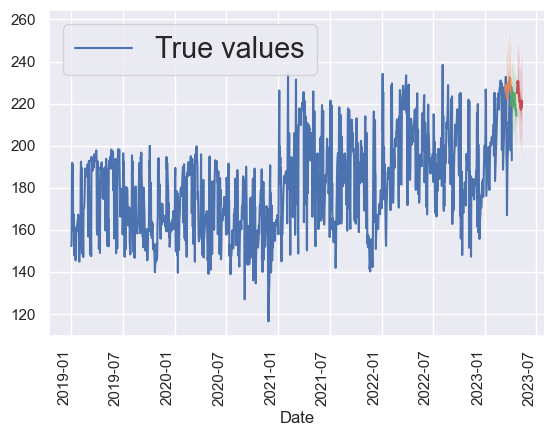

In [172]:
# Plot predictions
end_date = "2023-04-09"
merged_df_new = merged_df_new[:end_date]
merged_df_new["Energy Required (MU)"].plot()
for forecast in forecasts:
    ax = forecast.plot()
    plt.xticks(rotation=90)
plt.legend(["True values"], loc="upper left", fontsize="xx-large")
plt.show()


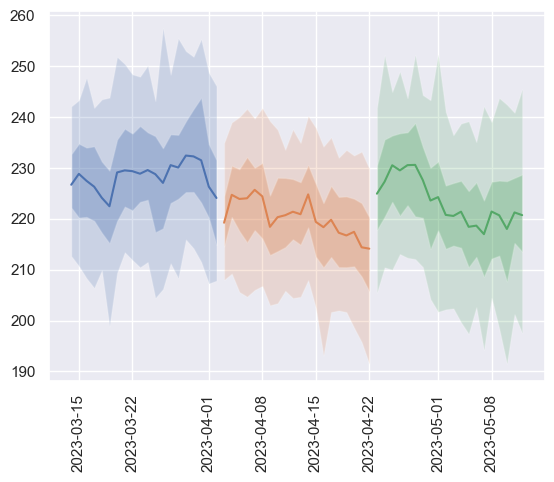

In [173]:
for forecast in forecasts:
    ax = forecast.plot()
    plt.xticks(rotation=90)
    
    

: 

: 

In [ ]:
merged_df

In [22]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/569.7 kB ? eta -:--:--
     ---- ---------------------------------- 61.4/569.7 kB 1.1 MB/s eta 0:00:01
     ------- ------------------------------ 112.6/569.7 kB 1.1 MB/s eta 0:00:01
     --------- -------------------------- 143.4/569.7 kB 944.1 kB/s eta 0:00:01
     ------------ ----------------------- 194.6/569.7 kB 980.4 kB/s eta 0:00:01
     -------------- --------------------- 225.3/569.7 kB 981.9 kB/s eta 0:00:01
     ---------------- ------------------- 256.0/569.7 kB 874.6 kB/s eta 0:00:01
     ------------------- ---------------- 307.2/569.7 kB 948.8 kB/s eta 0:00:01
     --------------------- -------------- 337.9/569.7 kB 912.8 kB/s eta 0:00:01
     ----------------------- ------------ 368.6/569.7 kB 849.3 kB/s eta 0:00:01
     ------------------------- ---------- 409.6/569.7 kB 881.6 kB/s eta 0:00:01
     ---------------------------- ------- 450.6/5


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
model = pm.auto_arima(merged_df[''], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

In [1]:
merged_df

NameError: name 'merged_df' is not defined